# 数据分组

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## GroupBy 简介

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
grouped = tips['tip'].groupby(tips.sex)
grouped

In [6]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [10]:
date_mean = tips['tip'].groupby([tips['day'],tips['time']])
date_mean

In [11]:
date_mean.mean()

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

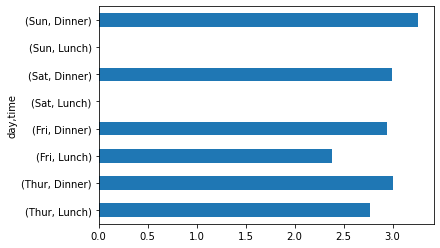

In [12]:
date_mean.mean().plot(kind='barh')

In [13]:
for name, group in tips.groupby(tips['sex']):
    print(name)
    print(group)

Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female  

In [14]:
tips.groupby(tips['sex']).size()

sex
Male      157
Female     87
dtype: int64

## 按列名分组

In [16]:
smoker = tips.groupby('smoker')
smoker

In [17]:
smoker_mean = smoker.mean()

In [18]:
smoker_mean

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


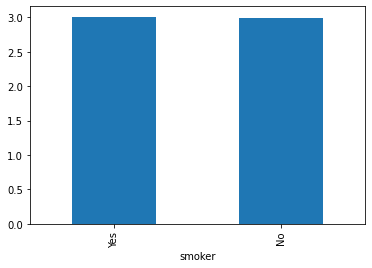

In [21]:
smoker_mean['tip'].plot(kind='bar')

In [22]:
size_mean1 = tips['tip'].groupby(tips['size']).mean()

In [23]:
size_mean1

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [26]:
size_mean2 = tips.groupby('size')['tip'].mean()
size_mean2

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

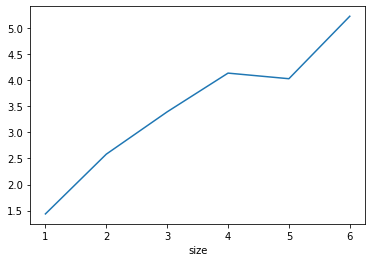

In [27]:
size_mean2.plot()

## 按列表或元祖分组

In [28]:
df = pd.DataFrame(np.arange(16).reshape(4,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [29]:
list1 = ['a','b','a','b']

In [30]:
df.groupby(list1).sum()

,0,1,2,3
a,8,10,12,14
b,16,18,20,22


## 按字典分组

In [32]:
df = pd.DataFrame(np.random.normal(size=(6,6)),index=['a','b','c','A','B','C'])
df

,0,1,2,3,4,5
a,-0.755261,0.707277,-1.987593,-0.713890,0.967758,-1.008437
b,0.416501,2.264483,-0.425606,-1.773766,0.670626,0.084032
c,0.652819,-0.269392,1.035907,1.256263,-0.371868,0.140750
A,0.330005,0.705008,-1.524099,-1.251850,0.933008,-0.667379
B,0.894069,-0.648764,-0.376306,-0.458809,0.187268,-1.048987
C,0.729752,-0.864071,-1.651730,-0.812694,1.413291,-0.080775


In [33]:
dict1 = {
    'a':'one',
    'A':'one',
    'b':'two',
    'B':'two',
    'c':'three',
    'C':'three',
}

In [34]:
df.groupby(dict1).sum()

,0,1,2,3,4,5
one,-0.425256,1.412285,-3.511692,-1.965740,1.900766,-1.675816
three,1.382571,-1.133463,-0.615824,0.443568,1.041424,0.059975
two,1.310570,1.615719,-0.801912,-2.232574,0.857894,-0.964955


## 按函数分组

In [35]:
df = pd.DataFrame(np.random.randn(4,4))
df

,0,1,2,3
0,-0.877682,0.416986,-0.678391,0.943079
1,0.803972,-0.671378,1.155213,-1.558124
2,-0.043733,-0.912775,-1.042463,-1.129463
3,-1.271438,0.360485,-0.795892,-0.202295


In [36]:
def jug(x):
    if x >= 0:
        return 'a'
    else:
        return 'b'

In [37]:
df[3].groupby(df[3].map(jug))

In [42]:
df[3].groupby(df[3].map(jug)).sum()

3
a    0.943079
b   -2.889882
Name: 3, dtype: float64

# 聚合运算

## 聚合函数

In [43]:
max_tip = tips.groupby('sex')['tip'].max()
max_tip

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

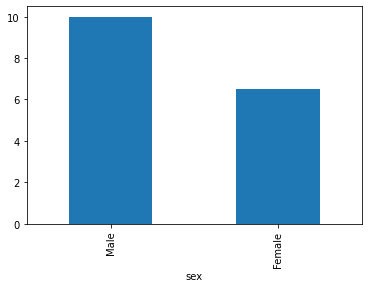

In [44]:
max_tip.plot(kind='bar')

### 自定义函数

In [45]:
def get_range(x):
    return x.max() - x.min()

In [46]:
tips_range = tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Male      9.0
Female    5.5
Name: tip, dtype: float64

## 多函数应用

### 一列多函数

In [47]:
tips.groupby(['sex','smoker'])['tip'].agg(['mean','std',get_range])

mean       std  get_range
sex    smoker                               
Male   Yes     3.051167  1.500120       9.00
       No      3.113402  1.489559       7.75
Female Yes     2.931515  1.219916       5.50
       No      2.773519  1.128425       4.20

### 多列多函数

In [48]:
tips.groupby(['day','time'])['total_bill','tip'].agg(['mean',get_range])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill                 tip          
                  mean get_range      mean get_range
day  time                                           
Thur Lunch   17.664754     35.60  2.767705      5.45
     Dinner  18.780000      0.00  3.000000      0.00
Fri  Lunch   12.845714      7.69  2.382857      1.90
     Dinner  19.663333     34.42  2.940000      3.73
Sat  Lunch         NaN       NaN       NaN       NaN
     Dinner  20.441379     47.74  2.993103      9.00
Sun  Lunch         NaN       NaN       NaN       NaN
     Dinner  21.410000     40.92  3.255132      5.49

### 不同列不同函数

In [49]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':'sum','tip':'mean'})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill       tip
day  time                        
Thur Lunch      1077.55  2.767705
     Dinner       18.78  3.000000
Fri  Lunch        89.92  2.382857
     Dinner      235.96  2.940000
Sat  Lunch          NaN       NaN
     Dinner     1778.40  2.993103
Sun  Lunch          NaN       NaN
     Dinner     1627.16  3.255132

In [50]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':['sum','mean'],'tip':'mean'})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill                  tip
                   sum       mean      mean
day  time                                  
Thur Lunch     1077.55  17.664754  2.767705
     Dinner      18.78  18.780000  3.000000
Fri  Lunch       89.92  12.845714  2.382857
     Dinner     235.96  19.663333  2.940000
Sat  Lunch         NaN        NaN       NaN
     Dinner    1778.40  20.441379  2.993103
Sun  Lunch         NaN        NaN       NaN
     Dinner    1627.16  21.410000  3.255132

In [52]:
no_index = tips.groupby(['sex','smoker'],as_index=False)['tip'].mean()
no_index

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519


In [53]:
index = tips.groupby(['sex','smoker'],as_index=True)['tip'].mean()
index

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

# 分组运算

## transform

In [54]:
df = pd.DataFrame(tips.groupby('sex')['tip'].mean())
df

,tip
sex,
Male,3.089618
Female,2.833448


In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
new_tips = pd.merge(tips,df,left_on='sex',right_index=True)
new_tips.head()

,total_bill,tip_x,sex,smoker,day,time,size,tip_y
0,16.99,1.01,Female,No,Sun,Dinner,2,2.833448
4,24.59,3.61,Female,No,Sun,Dinner,4,2.833448
11,35.26,5.00,Female,No,Sun,Dinner,4,2.833448
14,14.83,3.02,Female,No,Sun,Dinner,2,2.833448
16,10.33,1.67,Female,No,Sun,Dinner,3,2.833448


In [58]:
tips.groupby('sex')['tip'].transform('mean')

0      2.833448
1      3.089618
2      3.089618
3      3.089618
4      2.833448
         ...   
239    3.089618
240    2.833448
241    3.089618
242    3.089618
243    2.833448
Name: tip, Length: 244, dtype: float64

## apply

In [59]:
def top(x, n=5):
    return x.sort_values(by='tip',ascending=True)[-n:]

In [61]:
tips.groupby('sex').apply(top)

total_bill    tip     sex smoker   day    time  size
sex                                                             
Male   141       34.30   6.70    Male     No  Thur   Lunch     6
       59        48.27   6.73    Male     No   Sat  Dinner     4
       23        39.42   7.58    Male     No   Sat  Dinner     4
       212       48.33   9.00    Male     No   Sat  Dinner     4
       170       50.81  10.00    Male    Yes   Sat  Dinner     3
Female 143       27.05   5.00  Female     No  Thur   Lunch     6
       155       29.85   5.14  Female     No   Sun  Dinner     5
       85        34.83   5.17  Female     No  Thur   Lunch     4
       52        34.81   5.20  Female     No   Sun  Dinner     4
       214       28.17   6.50  Female    Yes   Sat  Dinner     3

In [62]:
tips.groupby('sex',group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
85,34.83,5.17,Female,No,Thur,Lunch,4
52,34.81,5.20,Female,No,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


# 数据透视表 pivot_table 函数

## 透视表

In [63]:
tips.pivot_table(values='tip',index='sex',columns='smoker')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


### 指定运算函数

In [64]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum')

smoker,Yes,No
sex,,
Male,183.07,302.00
Female,96.74,149.77


### 加入分项小计

In [66]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,183.07,302.00,485.07
Female,96.74,149.77,246.51
All,279.81,451.77,731.58


## 交叉表

- 用于计算分组频率

In [67]:
cross_table = pd.crosstab(index=tips['day'],columns=tips['size'])
cross_table

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


### div 函数,可以使每行的和为 1

In [69]:
df = cross_table.div(cross_table.sum(1),axis=0)
df

size,1,2,3,4,5,6
day,,,,,,
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158


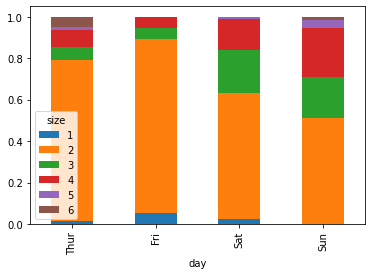

In [79]:
df.plot(kind='bar',stacked=True,grid=False)